# 0 Prequisites and Imports

Prequisites:
For this notebook, you need a python environment with the following libraries installed:
- Pandas
- GeoPandas
- Contextily
- Matplotlib

In [1]:
import geopandas as gpd
import contextily as ctx
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
# Load example Dataset
df = pd.read_csv('https://www.opengov-muenchen.de/dataset/2f256473-423d-4c3d-846c-09977aa31205/resource/4ac5b616-ebbf-4857-ae79-43369d6c4c87/download/m-wlan2015-01-21.csv')
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs=4326)

In [3]:
# Little Helper function for figure and ax dimensions
def print_fig_and_ax_sizes():
    ax_extend = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig_extend = fig.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    print(f'Figure Size: Width={fig_extend.width}, Height={fig_extend.height}')
    print(f'Axes Size: Width={ax_extend.width}, Height={ax_extend.height}')

# Problem:
When you use `Geopandas.plot()` the original axes aspect gets adjusted to the extends of your dataset. 
Espacially, when you want a fix figure aspect, this behavoiur is not what you want. Don't get confused by the output. It seams, that `ipython` automatically applies `tight_layout` when displaying plots. 

Figure Size: Width=10.0, Height=3.0
Axes Size: Width=2.764010574486349, Height=2.265


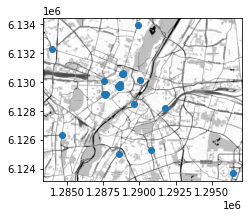

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10, 3))

ax = gdf.to_crs(epsg=3857).plot(ax = ax)
ctx.add_basemap(ax = ax,
               source=ctx.providers.Stamen.Toner, 
               attribution=False)

print_fig_and_ax_sizes()

Figure Size: Width=5.0, Height=3.0
Axes Size: Width=2.764010574486348, Height=2.265


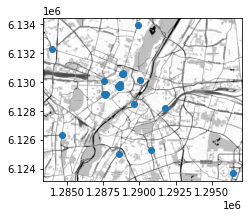

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5, 3))

gdf.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax=ax,  
               source=ctx.providers.Stamen.Toner, 
               attribution=False)

print_fig_and_ax_sizes()

As you see, the ax dimensions are only dominated by the y axis. A change of the figure width has no effect on the plot result. Espacially if you use `fig.tight_layout()`, like `ipython` does, you will end up with the exact same output.

# Solution:
The solution to this problem is a simple, but well hidden one-liner:
`ax.set_adjustable("datalim")` https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_adjustable.html

Figure Size: Width=5.0, Height=3.0
Axes Size: Width=3.875, Height=2.265


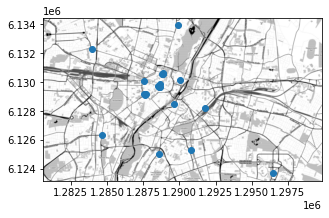

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5, 3))

ax.set_adjustable("datalim") # <------------------ Does the trick

gdf.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax=ax,  
               source=ctx.providers.Stamen.Toner, 
               attribution=False)

print_fig_and_ax_sizes()

Figure Size: Width=10.0, Height=3.0
Axes Size: Width=7.75, Height=2.265


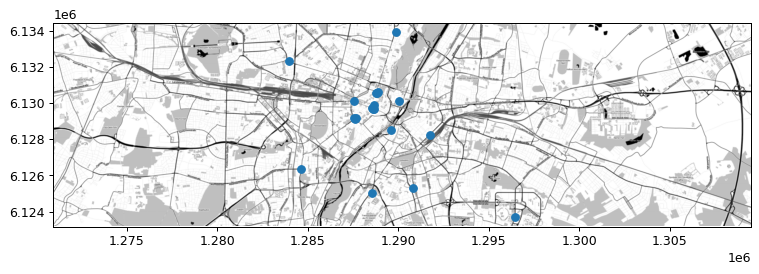

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10, 3), dpi=90)

ax.set_adjustable("datalim") # <------------------ Does the trick

gdf.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax=ax,  
               source=ctx.providers.Stamen.Toner, 
               attribution=False)

print_fig_and_ax_sizes()

# Contextily Limitations:
This approach only works, reliable if you transform your data to `WebMercator(epsg:3857)` before plotting. Otherwise `contexitly` may fail filling up the entire Axes area:

Figure Size: Width=10.0, Height=3.0
Axes Size: Width=7.75, Height=2.265


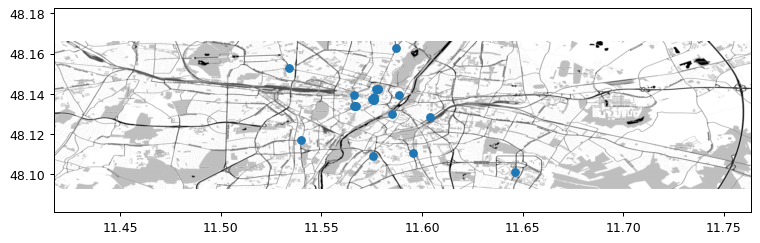

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10, 3), dpi=90)

ax.set_adjustable("datalim") # <------------------ Does the trick

gdf.plot(ax=ax)
ctx.add_basemap(ax=ax,
                crs=gdf.crs.to_string(),
                source=ctx.providers.Stamen.Toner, 
                attribution=False)

print_fig_and_ax_sizes()